In [1]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
from PIL import Image

%matplotlib inline


In [2]:
bilibili_mask=np.array(Image.open('./picture_result/bilibili_origin.png'))

In [3]:
def str_list(s:str):
    s=s.strip('"').strip("[").strip("]").strip("'").split("', '")
    return [i.strip() for i in s]

In [4]:
tags=[]
titles=[]
reply=[]
disc=[]
rel_titles=[]
reply_txt=[]
with open('./csv_result/csv_result0.csv','r',encoding='utf-8') as f:
    csv_reader=csv.reader(f)
    for row in csv_reader:
        if row!=[]:
            tags+=str_list(row[2])
            titles.append(row[0])
            reply.append(str_list(row[-1]))
            reply_txt.append(row[-1].replace('[','').replace(']','').replace('"','').replace(',','').replace(' ','').replace('\n','').replace("'",''))
            disc.append(row[3])
            rel_titles.append(str_list(row[4]))

In [5]:
with open('./txt_result/txt_result0.txt','w',encoding='utf-8') as f:
    for i in range(len(titles)):
        f.write("{}\n{}\n".format(titles[i],reply_txt[i][:64]+(64-len(reply_txt[i][:64]))*" "))


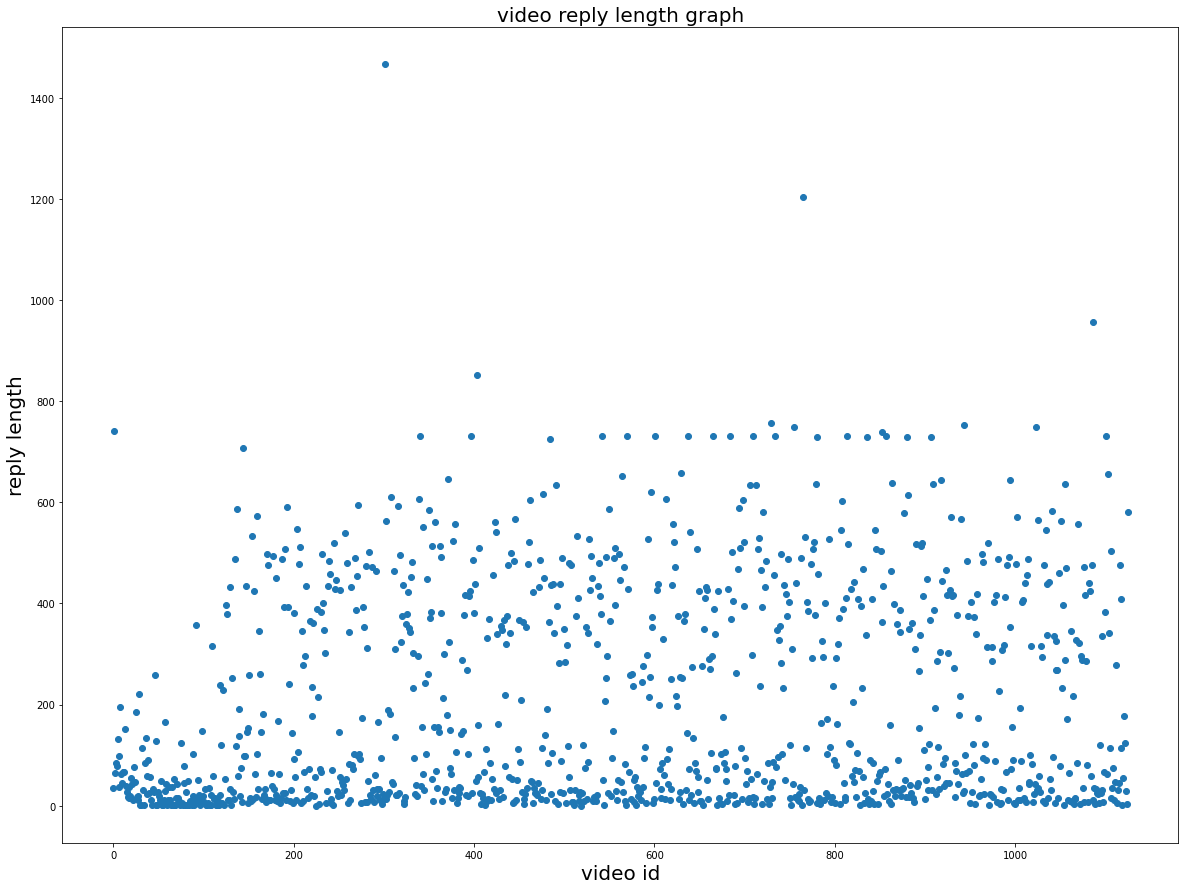

In [6]:
x=[]
for txt in reply_txt:
    x.append(len(txt))

y=[i for i in range(len(reply_txt))]
plt.figure(figsize=(20,15))
plt.scatter(y,x)
plt.xlabel('video id',fontsize=20)
plt.ylabel('reply length',fontsize=20)
plt.title('video reply length graph',fontsize=20)
plt.savefig('./picture_result/reply_length.png')
plt.show()

In [7]:
wordcloud=WordCloud(mask=bilibili_mask, font_path="C:/Windows/Fonts/STFANGSO.ttf",background_color="white",width=3000,height=3000,collocations=False).generate(" ".join(tags))


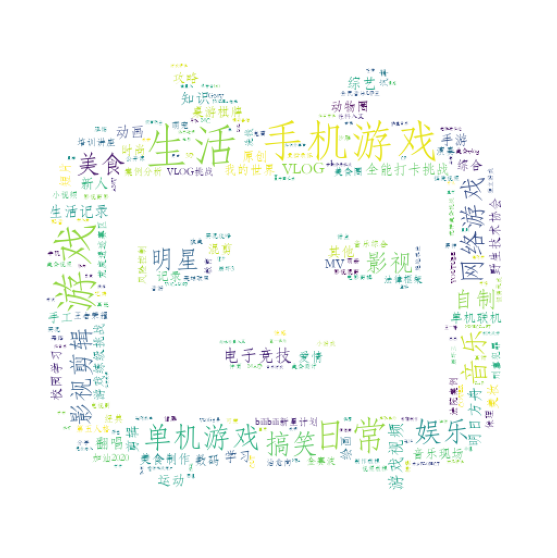

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig('./picture_result/tags_wordcloud.png',dpi=1200)
plt.show()
wordcloud.to_file('./picture_result/tags_wordcloud.png')

In [9]:
#从文件导入停用词表
stpwrdpath = "./stop_words/stop_words.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()

In [12]:
from jieba import lcut
from gensim.similarities import SparseMatrixSimilarity
from gensim.corpora import Dictionary
from gensim.models import TfidfModel


In [14]:
print(titles[0])
print(reply[0])

【白宇|罗非|照片】#罗非侦探的时装合集#
['av100000002', '九位数嘛！？', 'up互粉吗', '搜av号能进来？', '一亿已经没了']


In [29]:
def get_similarities(texts,keyword):
    sim=[]
    texts = [lcut(text) for text in texts]
    dictionary = Dictionary(texts)
    num_features = len(dictionary.token2id)
    corpus = [dictionary.doc2bow(text) for text in texts]
    kw_vector = dictionary.doc2bow(lcut(keyword))
    tfidf = TfidfModel(corpus)
    tf_texts = tfidf[corpus] 
    tf_kw = tfidf[kw_vector]
    sparse_matrix = SparseMatrixSimilarity(tf_texts, num_features)
    similarities = sparse_matrix.get_similarities(tf_kw)
    for e, s in enumerate(similarities, 1):
        # print('kw 与 text%d 相似度为：%.2f' % (e, s))
        sim.append(s)
    return sim

In [51]:
title_sims=[]
for i in range(len(reply)):
    sim=get_similarities(rel_titles[i],titles[i])
    print(len(sim))
    if not all(sim)==0:
        title_sims.append(sim+[0]*(20-len(sim)))
# print(title_sims)

20
17
20
20
20
20
20
20
20
20
21
20
20
20
21
20
21
18
19
1
21
20
15
20
21
20
21
20
21
20
21
20
20
20
20
21
20
11
20
8
20
21
20
20
21
20
20
20
20
20
18
20
20
7
20
20
20
20
20
13
20
20
20
20
21
20
20
20
20
20
20
20
1
20
21
20
21
7
21
20
21
20
20
20
20
1
20
20
18
20
21
20
20
21
20
20
20
19
21
15
21
20
20
20
21
20
20
21
20
21
21
20
20
21
20
20
21
20
20
20
20
20
20
21
20
20
20
20
20
20
21
1
20
20
21
20
20
20
20
20
17
20
20
18
20
21
20
18
20
21
21
20
20
20
20
20
20
20
18
20
20
20
20
20
20
20
21
20
20
20
6
20
20
20
21
14
20
20
20
9
20
21
20
20
20
20
21
21
20
21
15
20
21
18
20
11
20
20
20
20
21
20
21
20
20
20
20
20
20
21
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
1
20
20
20
20
20
20
20
20
21
20
20
19
20
20
21
20
20
21
18
20
21
20
20
18
18
20
20
20
20
8
20
21
20
21
20
20
20
19
20
20
20
20
21
20
21
18
21
9
20
20
20
21
20
20
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
20
20
20
20
20
21
20
20
20
20
20
20
20
17
20
19
20
20
20
20
20
20
21
21
20
20
21
20
21
20
20
21
20
20
20
18
3
20

In [87]:
title_sim_ar=(list(map(list, zip(*title_sims))))

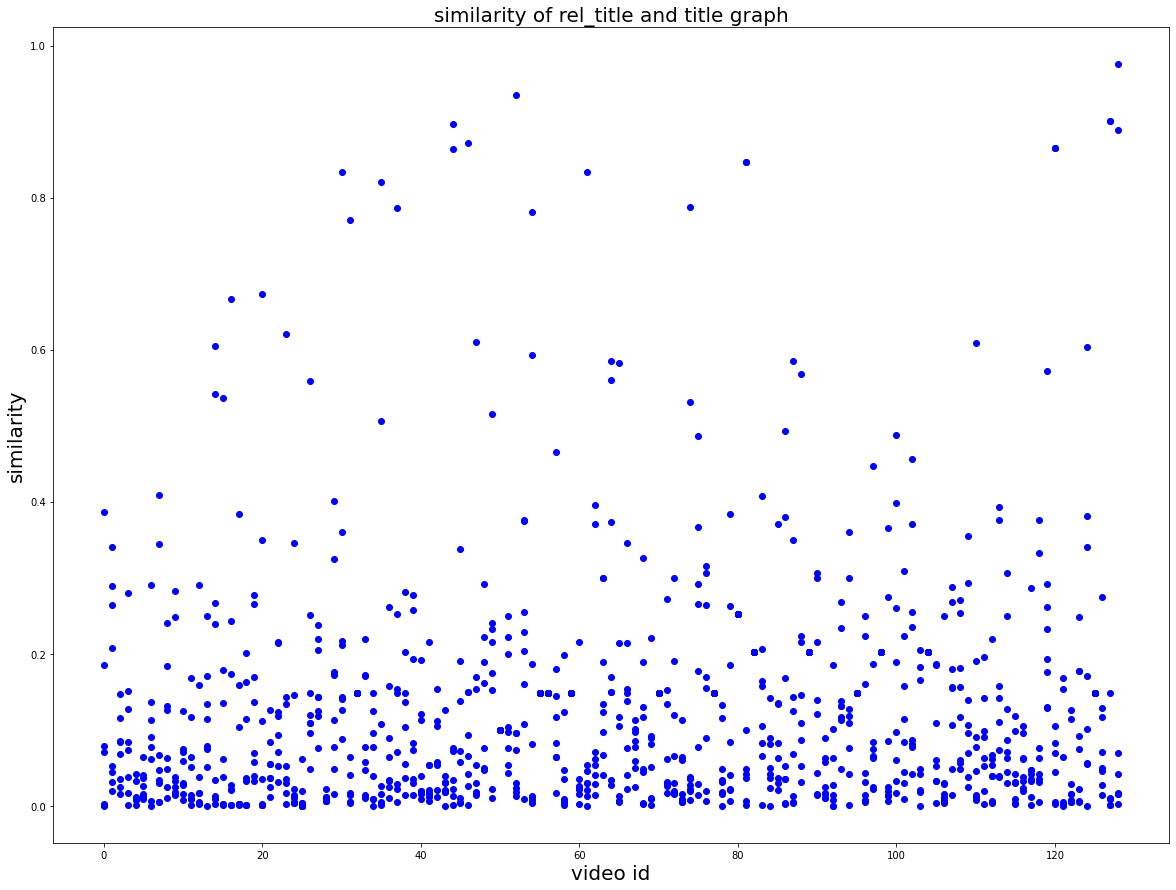

In [90]:
plt.figure(figsize=(20,15))
x=[i for i in range(len(title_sims))]
for i in range(len(title_sim_ar)):
    plt.scatter(x,title_sim_ar[i],c='b')
plt.xlabel('video id',fontsize=20)
plt.ylabel('similarity',fontsize=20)
plt.title('similarity of rel_title and title graph',fontsize=20)
plt.savefig('./picture_result/reltitle_title_similarity.png')
plt.show()

In [82]:
reply_sims=[]
for i in range(len(reply)):
    sim=get_similarities(reply[i],titles[i])
    # if not all(sim)==0:
    reply_sims.append(sim+[0]*(5-len(sim)))
print(reply_sims)

691, 0.07361668, 0.12916468, 0.027121773, 0.0, 0.0, 0.0, 0.022349184, 0.11622328], [0.14566103, 0.15088578, 0.13397849, 0.0, 0.0], [0.0, 0.31622776, 0, 0, 0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.13545768, 0.0, 0.0, 0.39129192, 0.0], [0.16752559, 0.0836127, 0.0, 0.113529205, 0.0, 0.15922254, 0.09935391, 0.21027905, 0.0, 0.11686782, 0.24037887, 0.0, 0.036504645, 0.04182957, 0.0, 0.06576619, 0.15992792, 0.0, 0.12248553, 0.022639412], [0.16612658, 0.33933684, 0.0, 0.1744417, 0.0, 0.024876276, 0.103368506, 0.22926056, 0.300306, 0.00436472, 0.107731365, 0.34317702, 0.34036404, 0.10626956, 0.300306, 0.27903616, 0.0, 0.0, 0.0449648, 0.0], [0.0, 0.0, 0.0, 0.015920227, 0.031957168, 0.011314919, 0.0, 0.0, 0.0, 0.0, 0.020923676, 0.0, 0.26212525, 0.0, 0.021856839, 0.0, 0.0, 0.025550371, 0.013673465, 0.01702781], [0.40369168, 0.0, 0.0, 0, 0], [0.0, 0.0, 0.17973252, 0.0, 0.124845676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.29480147, 0.0, 0.17659357, 0.0, 0.0], [0.24878883, 0.11826506, 0.20

In [73]:
print(len(reply_sims))

1126


In [83]:
reply_sim_ar=(list(map(list, zip(*reply_sims))))
print(len(reply_sim_ar[0]))
# y=[i+1 for i in range(5)]
# print([y[0]]*len(reply_sim_ar[0]))

1126


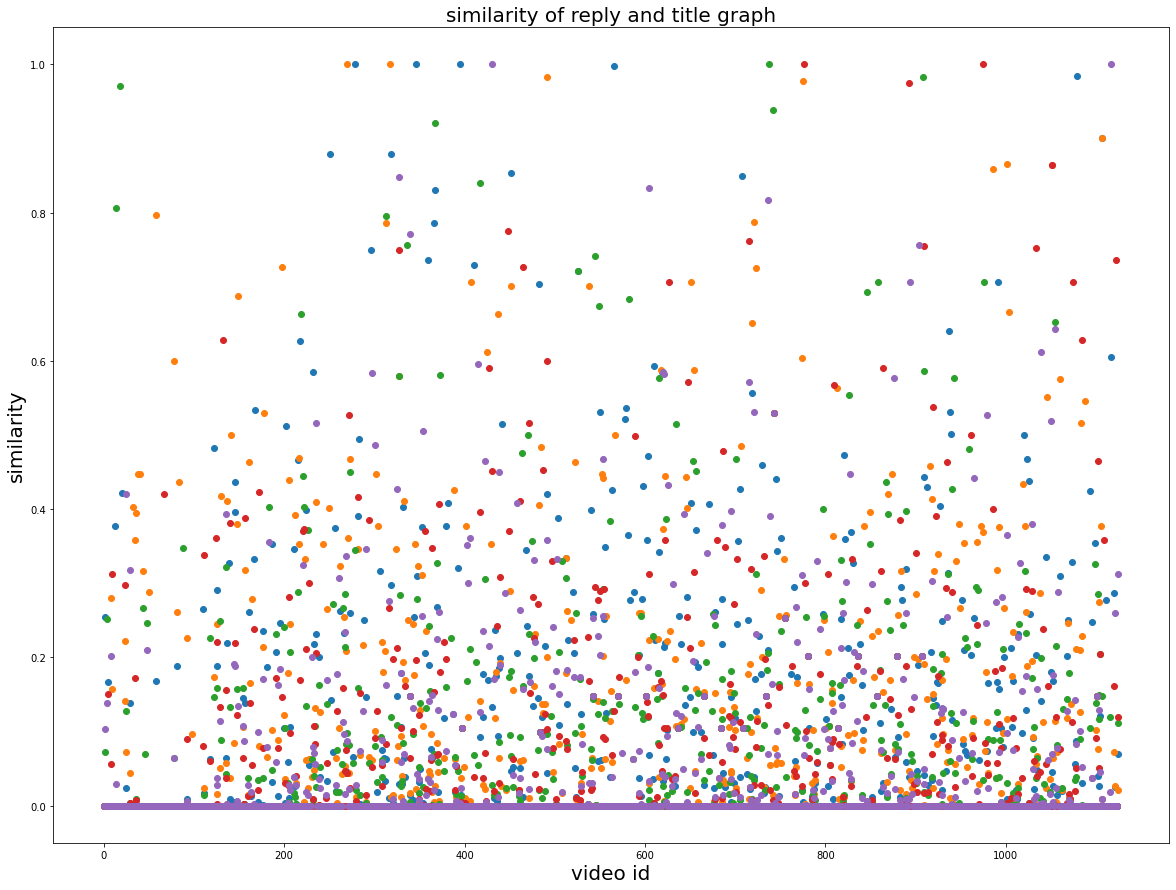

In [85]:

plt.figure(figsize=(20,15))
x=[i for i in range(len(reply_sims))]
for i in range(len(reply_sim_ar)):
    plt.scatter(x,reply_sim_ar[i])
plt.xlabel('video id',fontsize=20)
plt.ylabel('similarity',fontsize=20)
plt.title('similarity of reply and title graph',fontsize=20)
plt.savefig('./picture_result/reply_title_similarity.png')
plt.show()